In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from collections import defaultdict
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
plt.rcParams['figure.dpi']= 300  #resolution


In [2]:
df=pd.read_csv('data/fma_metadata/tracks.csv')

In [3]:
df.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [4]:
df['album_date_released'] = pd.to_datetime(df['album_date_released'],format='%Y-%m-%d %H:%M:%S')
df.dtypes

track_id                             int64
album_comments                       int64
album_date_created                  object
album_date_released         datetime64[ns]
album_engineer                      object
album_favorites                      int64
album_id                             int64
album_information                   object
album_listens                        int64
album_producer                      object
album_tags                          object
album_title                         object
album_tracks                         int64
album_type                          object
artist_active_year_begin            object
artist_active_year_end              object
artist_associated_labels            object
artist_bio                          object
artist_comments                      int64
artist_date_created                 object
artist_favorites                     int64
artist_id                            int64
artist_latitude                    float64
artist_loca

In [5]:
df['album_date_released'] = df['album_date_released'].fillna(df['album_date_released'].mode()[0])

In [6]:
df.isna().sum()

track_id                         0
album_comments                   0
album_date_created            3529
album_date_released              0
album_engineer               91279
album_favorites                  0
album_id                         0
album_information            23425
album_listens                    0
album_producer               88514
album_tags                       0
album_title                   1025
album_tracks                     0
album_type                    6508
artist_active_year_begin     83863
artist_active_year_end      101199
artist_associated_labels     92303
artist_bio                   35418
artist_comments                  0
artist_date_created            856
artist_favorites                 0
artist_id                        0
artist_latitude              62030
artist_location              36364
artist_longitude             62030
artist_members               59725
artist_name                      0
artist_related_projects      93422
artist_tags         

In [7]:
df = df.drop(df[df.album_date_released < '2015-01-01'].index)
df = df.drop(df[df.album_date_released > '2016-12-31'].index)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11611 entries, 10612 to 106323
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  11611 non-null  int64         
 1   album_comments            11611 non-null  int64         
 2   album_date_created        11611 non-null  object        
 3   album_date_released       11611 non-null  datetime64[ns]
 4   album_engineer            1982 non-null   object        
 5   album_favorites           11611 non-null  int64         
 6   album_id                  11611 non-null  int64         
 7   album_information         10306 non-null  object        
 8   album_listens             11611 non-null  int64         
 9   album_producer            2665 non-null   object        
 10  album_tags                11611 non-null  object        
 11  album_title               11611 non-null  object        
 12  album_tracks 

In [9]:
df['year']=df['album_date_released'].dt.year 
df['month']=df['album_date_released'].dt.month 
df['day']=df['album_date_released'].dt.day



df.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title,year,month,day
10612,17479,0,2009-07-28 08:40:53,2015-05-27,NaN,0,3932,NaN,1273,NaN,...,Attribution-Noncommercial-No Derivative Works ...,882,NaN,0,NaN,[],Air Of Happiness,2015,5,27
11109,18199,0,2009-08-12 21:09:36,2015-09-06,NaN,2,4121,"<p>All compositions written, performed and rec...",11207,NaN,...,Attribution-Noncommercial-Share Alike 3.0 New ...,958,NaN,3,NaN,"['ultra eczema', 'new zealand']",Wolfram,2015,9,6
11336,18606,0,2009-08-12 21:09:36,2015-09-06,NaN,2,4121,"<p>All compositions written, performed and rec...",11207,NaN,...,Attribution-Noncommercial-Share Alike 3.0 New ...,1377,NaN,1,NaN,"['ultra eczema', 'new zealand']",Coronation Song,2015,9,6
11337,18607,0,2009-08-12 21:09:36,2015-09-06,NaN,2,4121,"<p>All compositions written, performed and rec...",11207,NaN,...,Attribution-Noncommercial-Share Alike 3.0 New ...,2203,NaN,2,NaN,"['ultra eczema', 'new zealand']",Dear Giulietta,2015,9,6
11338,18608,0,2009-08-12 21:09:36,2015-09-06,NaN,2,4121,"<p>All compositions written, performed and rec...",11207,NaN,...,Attribution-Noncommercial-Share Alike 3.0 New ...,843,NaN,4,NaN,"['ultra eczema', 'new zealand']",I Am A Worm,2015,9,6


In [10]:
df['album_date_released'].value_counts()

2016-07-14    148
2016-12-12    133
2015-01-21    128
2016-01-22    118
2015-01-01    104
             ... 
2016-09-03      1
2016-02-27      1
2016-08-01      1
2016-07-31      1
2016-07-29      1
Name: album_date_released, Length: 600, dtype: int64

In [11]:
df['album_date_released'].value_counts()

2016-07-14    148
2016-12-12    133
2015-01-21    128
2016-01-22    118
2015-01-01    104
             ... 
2016-09-03      1
2016-02-27      1
2016-08-01      1
2016-07-31      1
2016-07-29      1
Name: album_date_released, Length: 600, dtype: int64

In [12]:
df.reset_index(inplace = True, drop = True)
index = pd.date_range(start='2016-01-01', end='2016-12-31' , freq='D')
index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [13]:
df = df[df['album_date_released'] > '2016-01-01']
df = df[df['album_date_released'] < '2016-12-31']

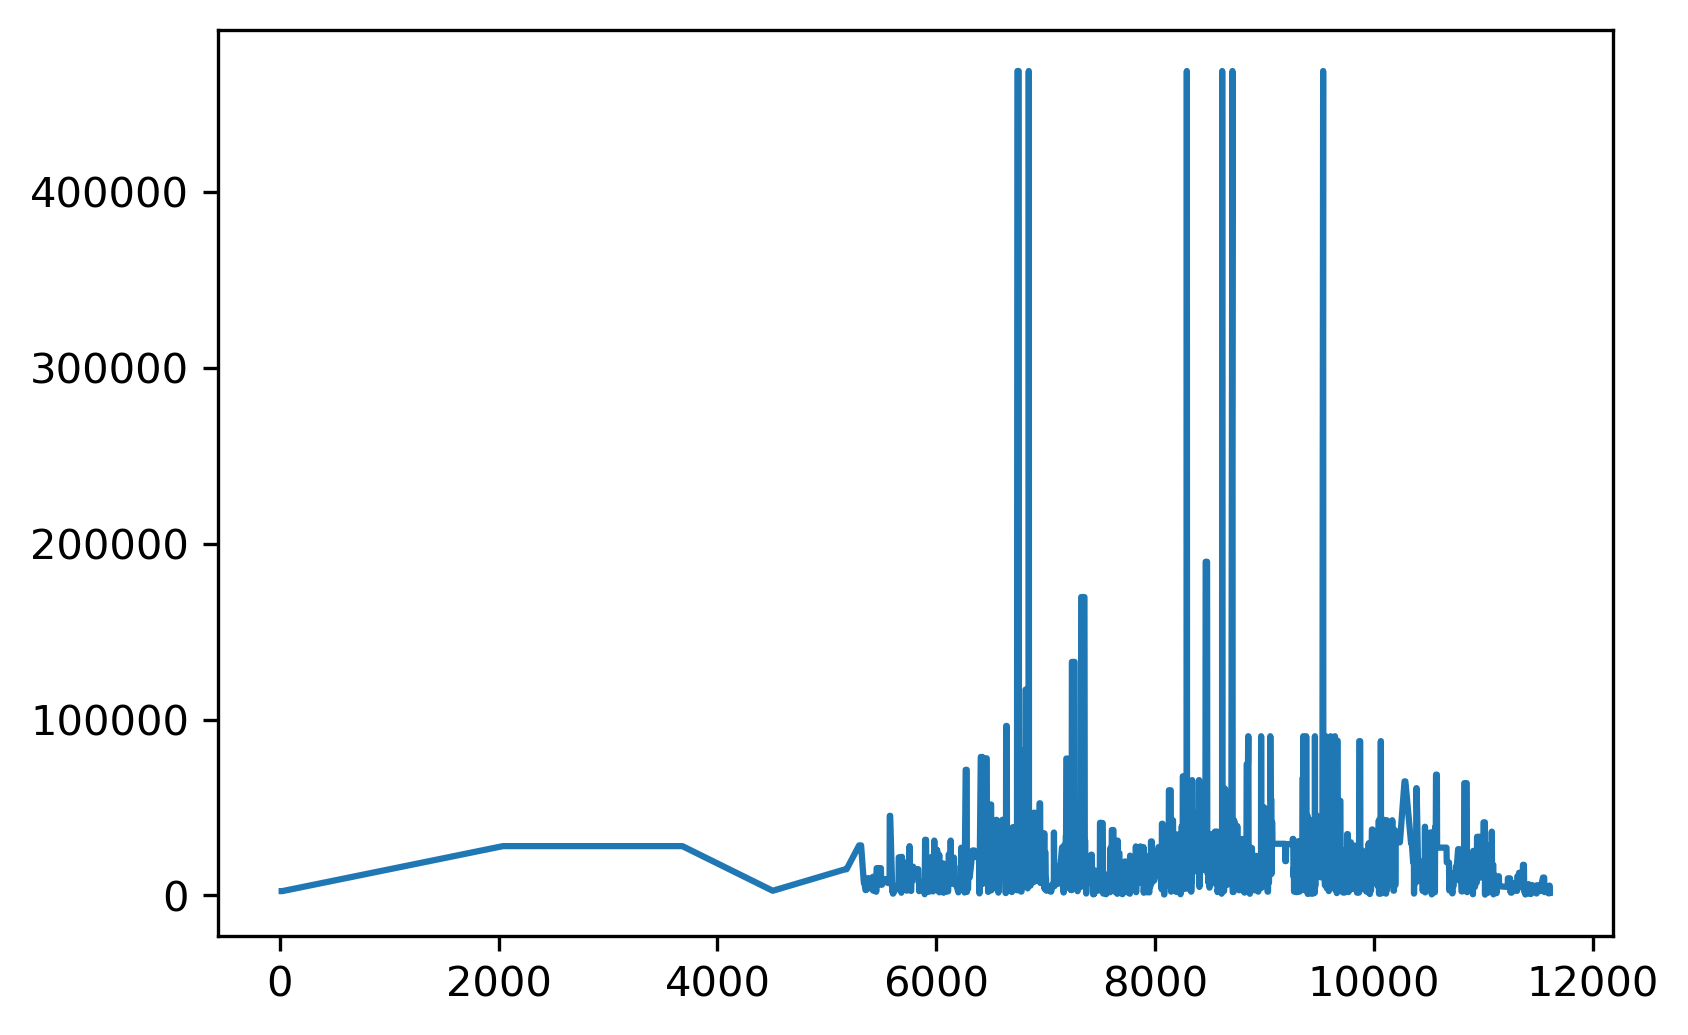

16       2404
17       2404
18       2404
19       2404
20       2404
         ... 
11606    5524
11607    5524
11608    5524
11609    1471
11610    1471
Name: album_listens, Length: 5219, dtype: int64

In [14]:
ts = df['album_listens']
plt.plot(ts)
plt.show()
ts

# TS DAY

In [15]:
df.reset_index(inplace = True, drop = True)
index_day = pd.date_range(start='2016-01-01', end='2016-12-31' , freq='D')
index_day

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [16]:
#consideration for 2016 year

ts_day=ts.sample(366)

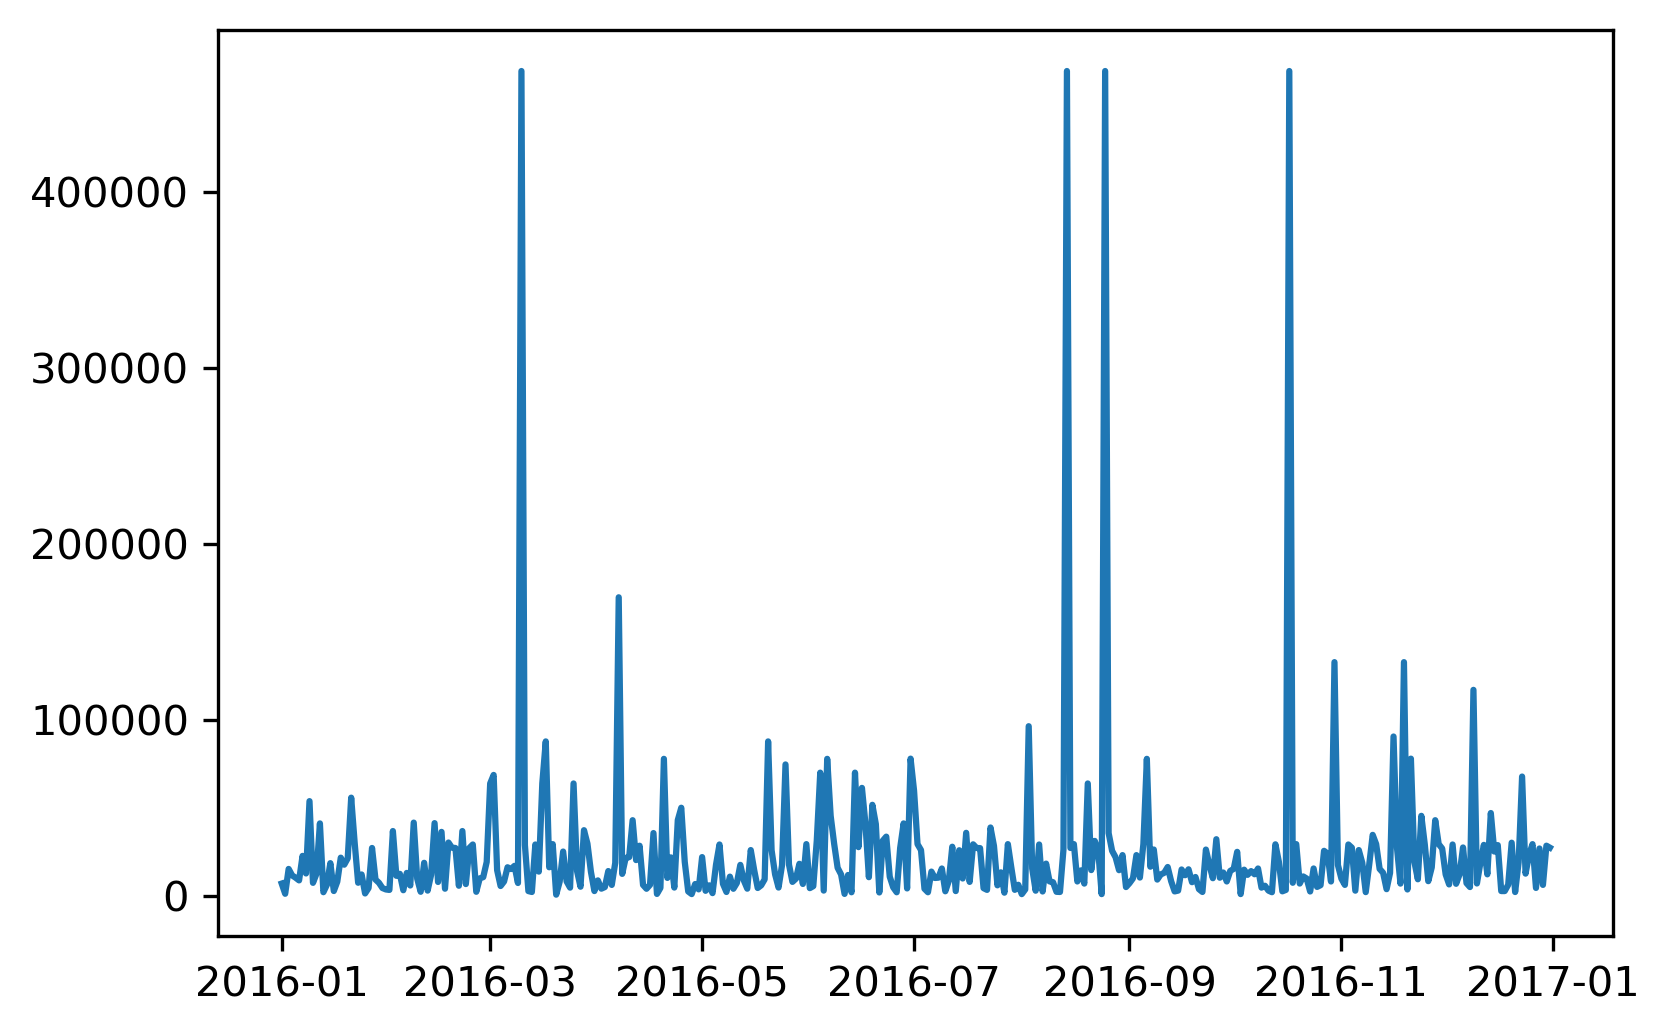

In [17]:
ts_day = pd.Series(ts_day.values, index_day)
plt.plot(ts_day)

plt.show()

# TS MONTH

In [18]:
df.reset_index(inplace = True, drop = True)
index_month = pd.date_range(start='2016-01-01', end='2016-12-31' , freq='M')
index_month

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

In [19]:
#consideration for 2016 year

ts_month=ts.sample(12)

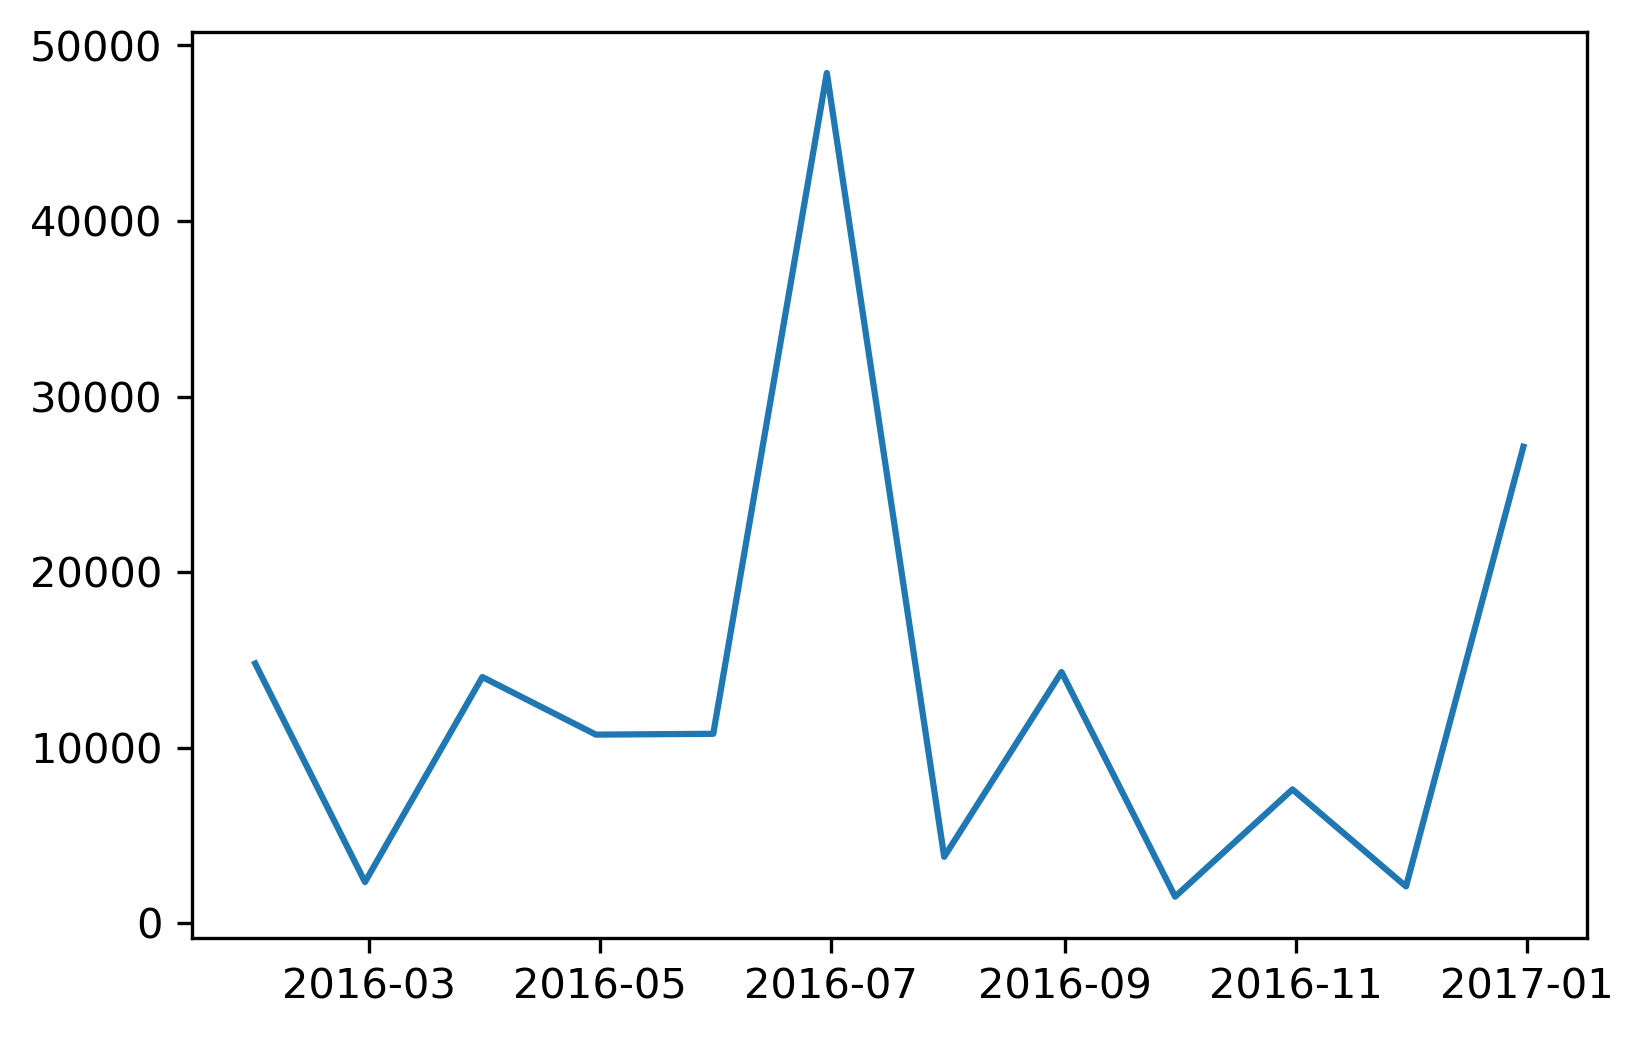

In [20]:
ts_month = pd.Series(ts_month.values, index_month)
plt.plot(ts_month)

plt.show()

# TS 10 YEARS

In [21]:
df.reset_index(inplace = True, drop = True)
index_yd = pd.date_range(start='2006-01-01', end='2016-12-31' , freq='D')
index_yd

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=4018, freq='D')

In [22]:
#consideration for 10 years with DAY

ts_years_day=ts.sample(4018)

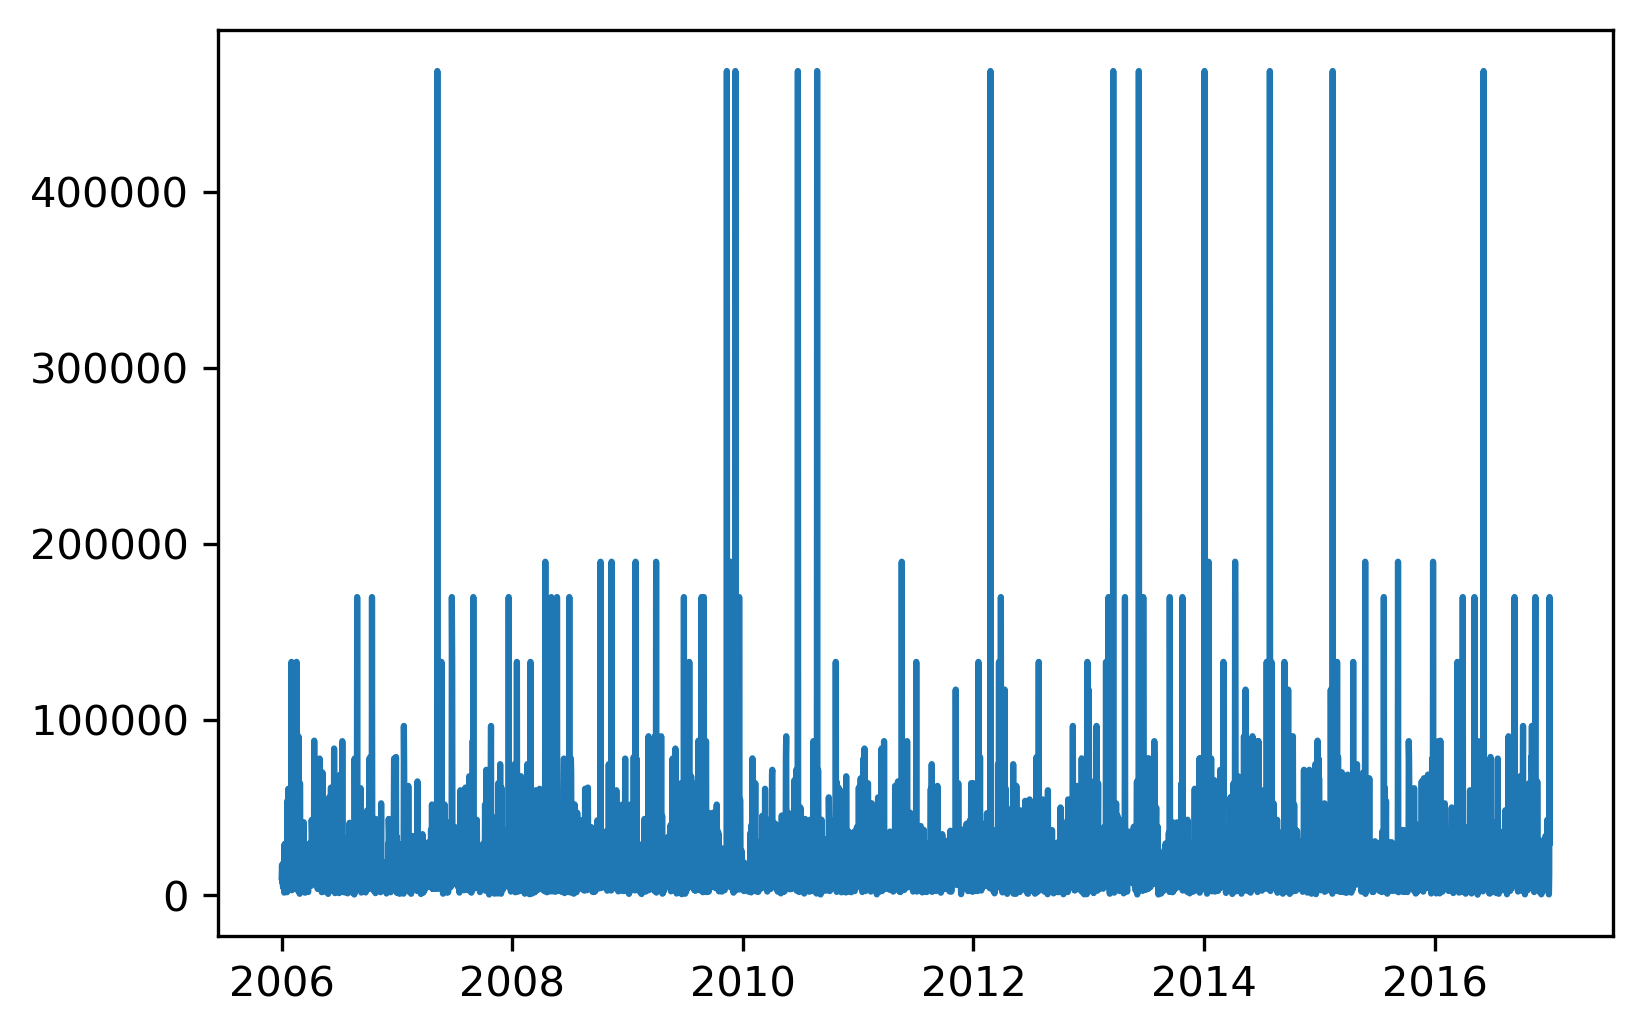

In [23]:
ts_years_day = pd.Series(ts_years_day.values, index_yd)
plt.plot(ts_years_day)

plt.show()

In [24]:
df.reset_index(inplace = True, drop = True)
index_ym = pd.date_range(start='2006-01-01', end='2016-12-31' , freq='M')
index_ym

DatetimeIndex(['2006-01-31', '2006-02-28', '2006-03-31', '2006-04-30',
               '2006-05-31', '2006-06-30', '2006-07-31', '2006-08-31',
               '2006-09-30', '2006-10-31',
               ...
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', length=132, freq='M')

In [25]:
#consideration for 10 years with MONTH

ts_years_month=ts.sample(132)

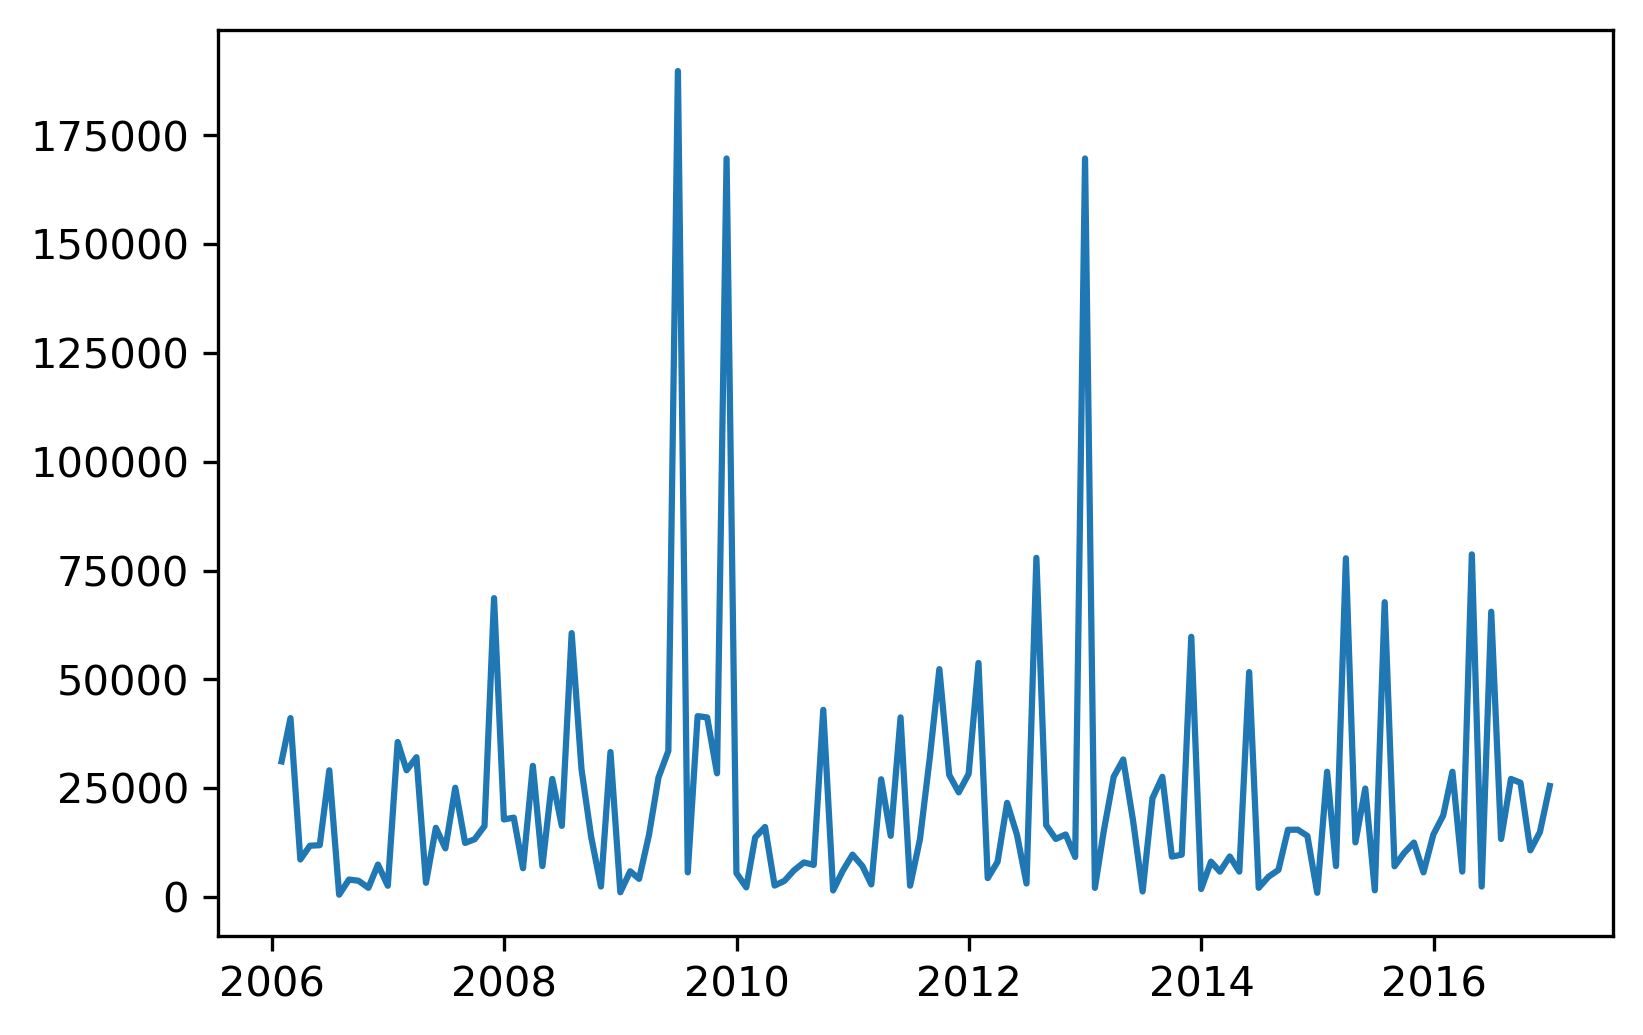

In [26]:
ts_years_month = pd.Series(ts_years_month.values, index_ym)
plt.plot(ts_years_month)

plt.show()

In [27]:
df.reset_index(inplace = True, drop = True)
index_yy = pd.date_range(start='2006-01-01', end='2016-12-31' , freq='Y')
index_yy

DatetimeIndex(['2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [28]:
#consideration for 10 years with YEAR

ts_years_y=ts.sample(11)

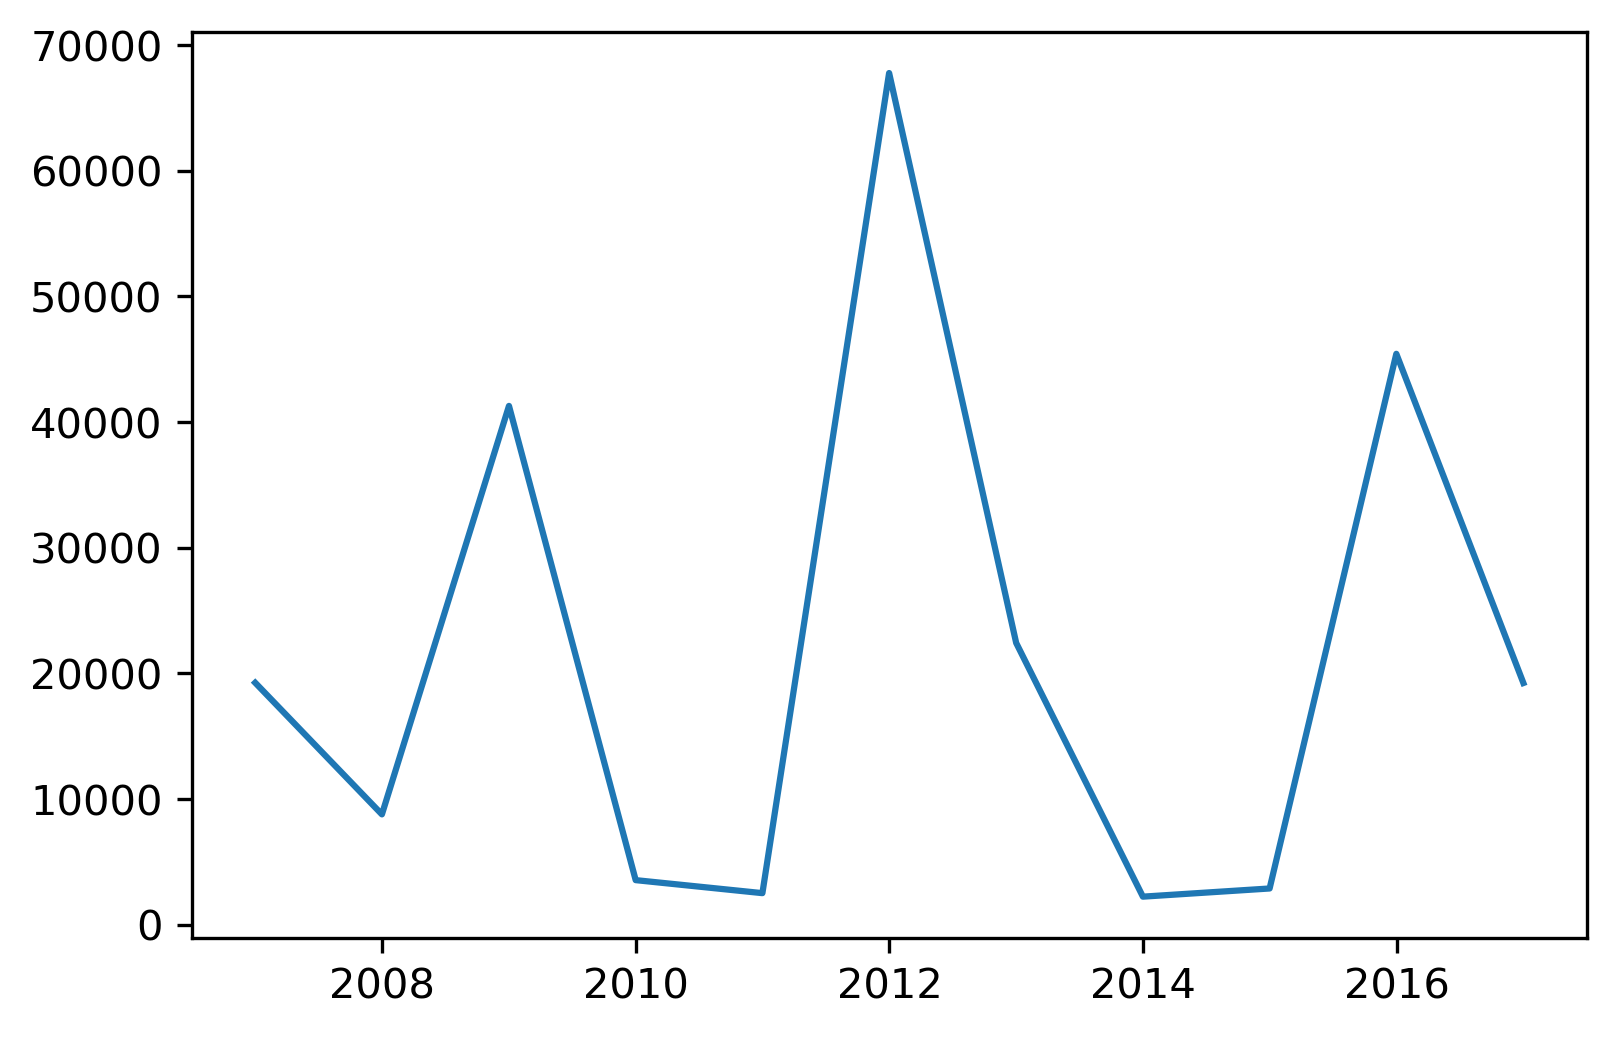

In [29]:
ts_years_y = pd.Series(ts_years_y.values, index_yy)
plt.plot(ts_years_y)

plt.show()

In [30]:
!pip install matrixprofile-ts



In [31]:
from matrixprofile import *

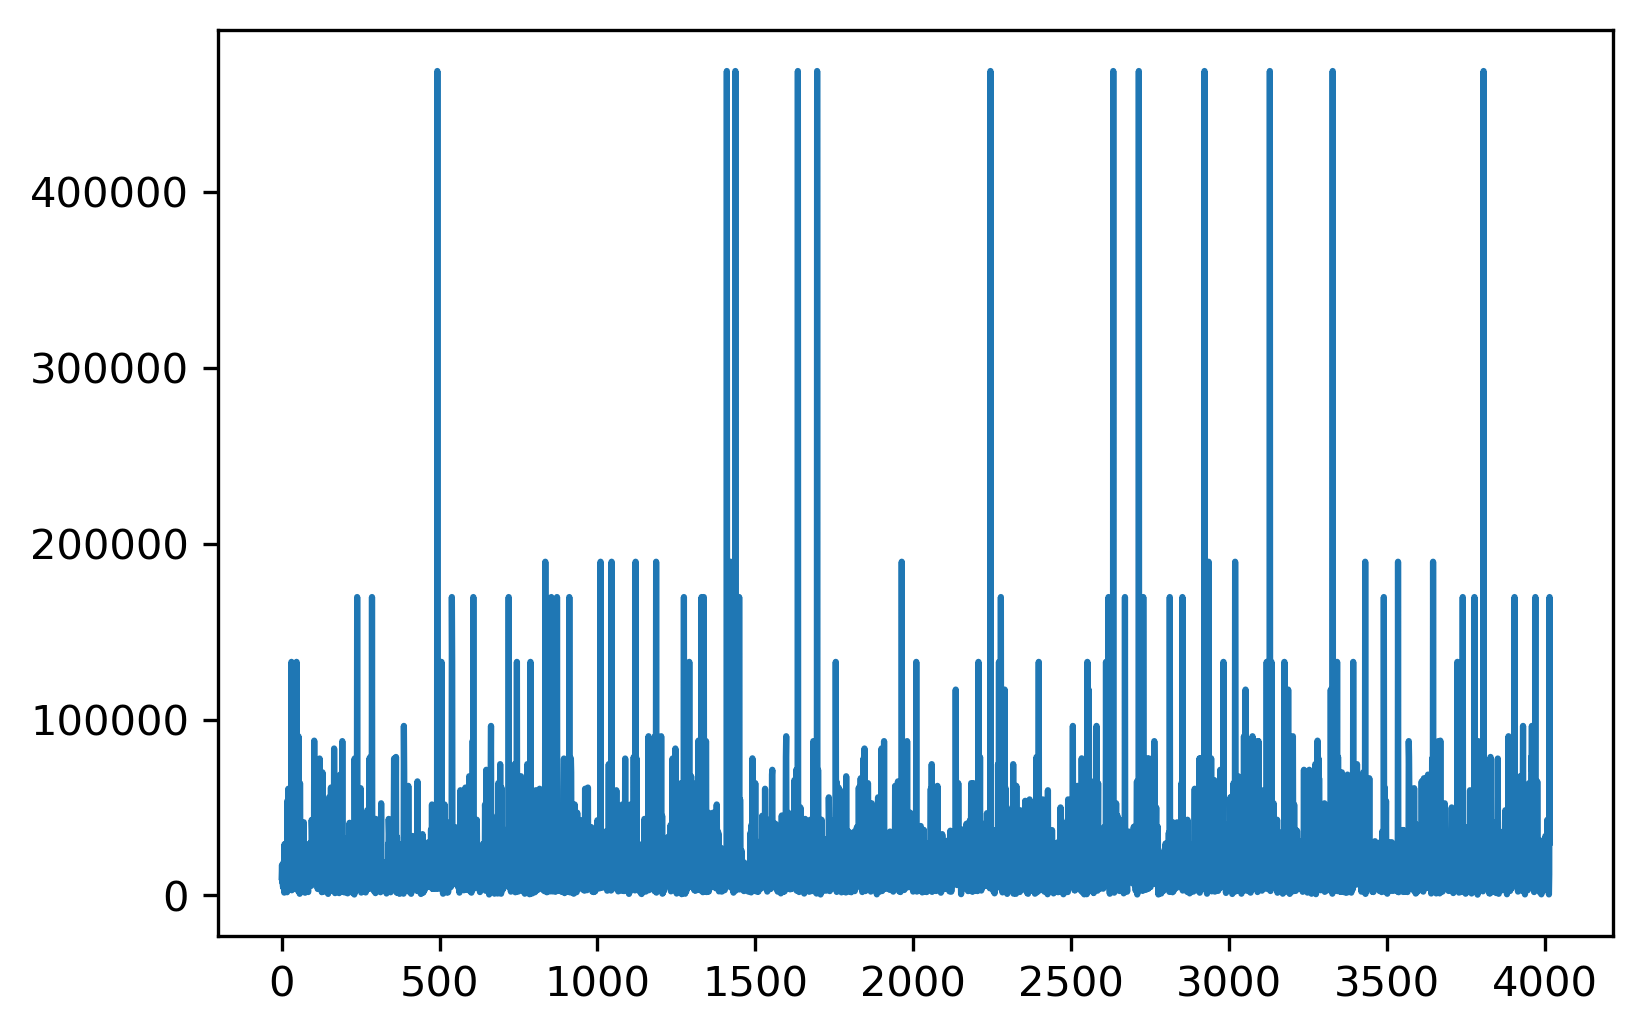

In [32]:
ts_cluster = ts_years_day.values
plt.plot(ts_cluster)

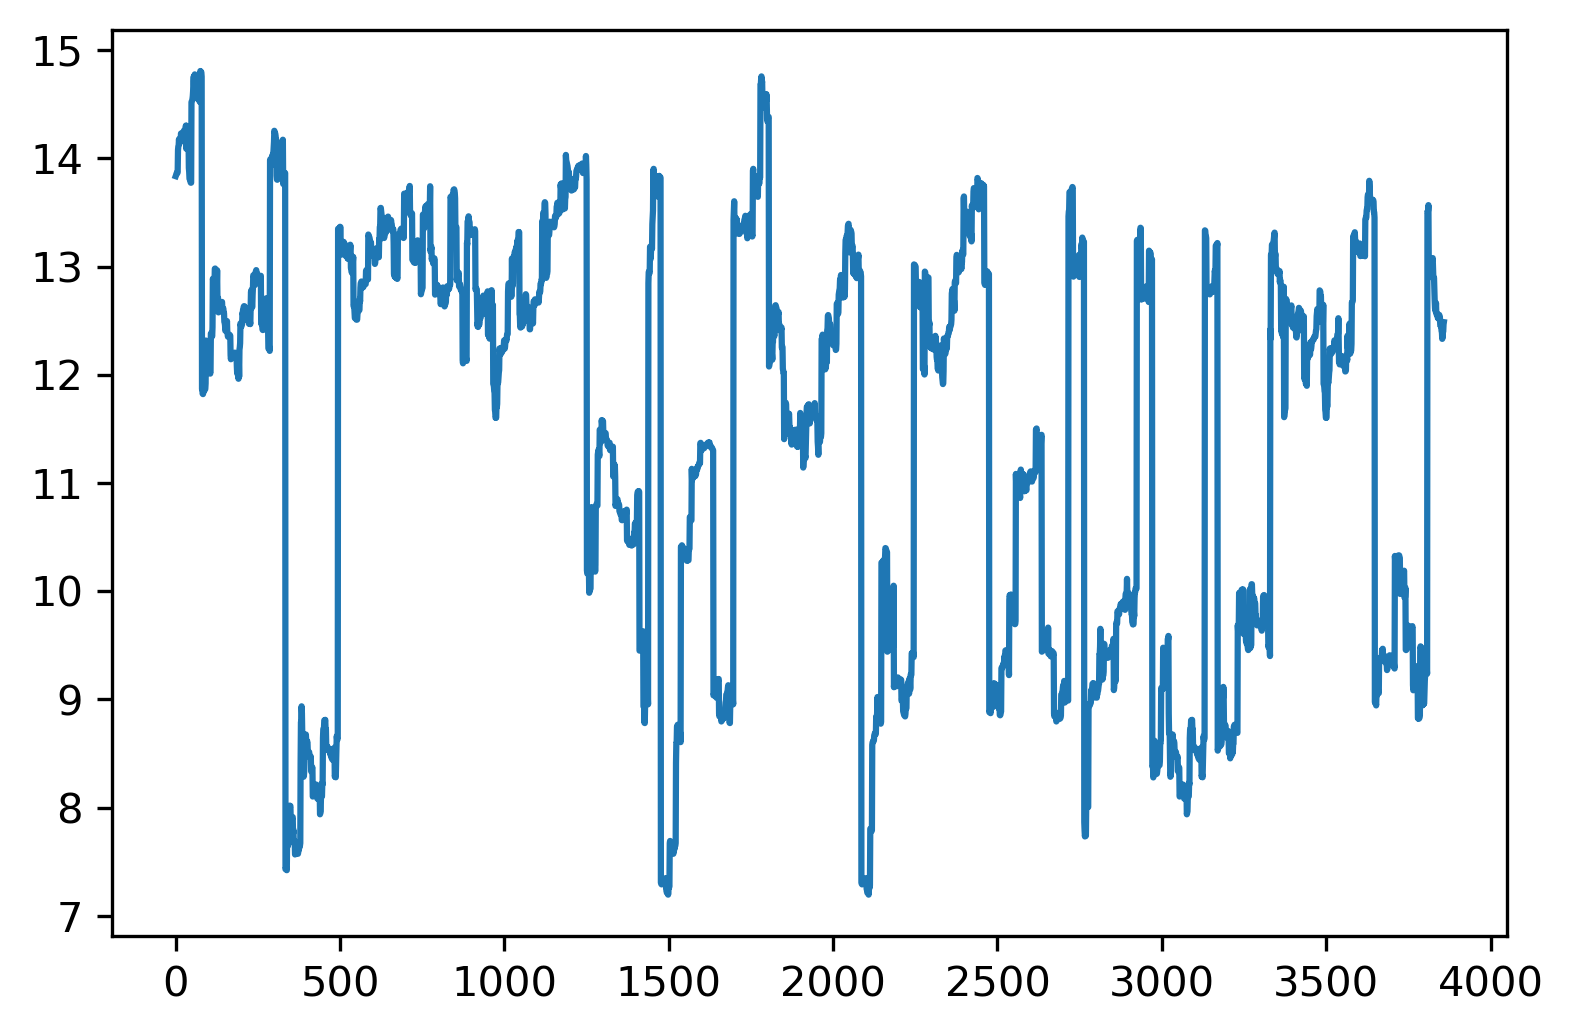

In [33]:
w = 160
mp, mpi = matrixProfile.stomp(ts_cluster, w)

plt.plot(mp)
plt.show()

# MOTIF DISCOVERY

In [34]:
mo, mod  = motifs.motifs(ts_cluster, (mp, mpi), ex_zone=180, max_motifs=6)

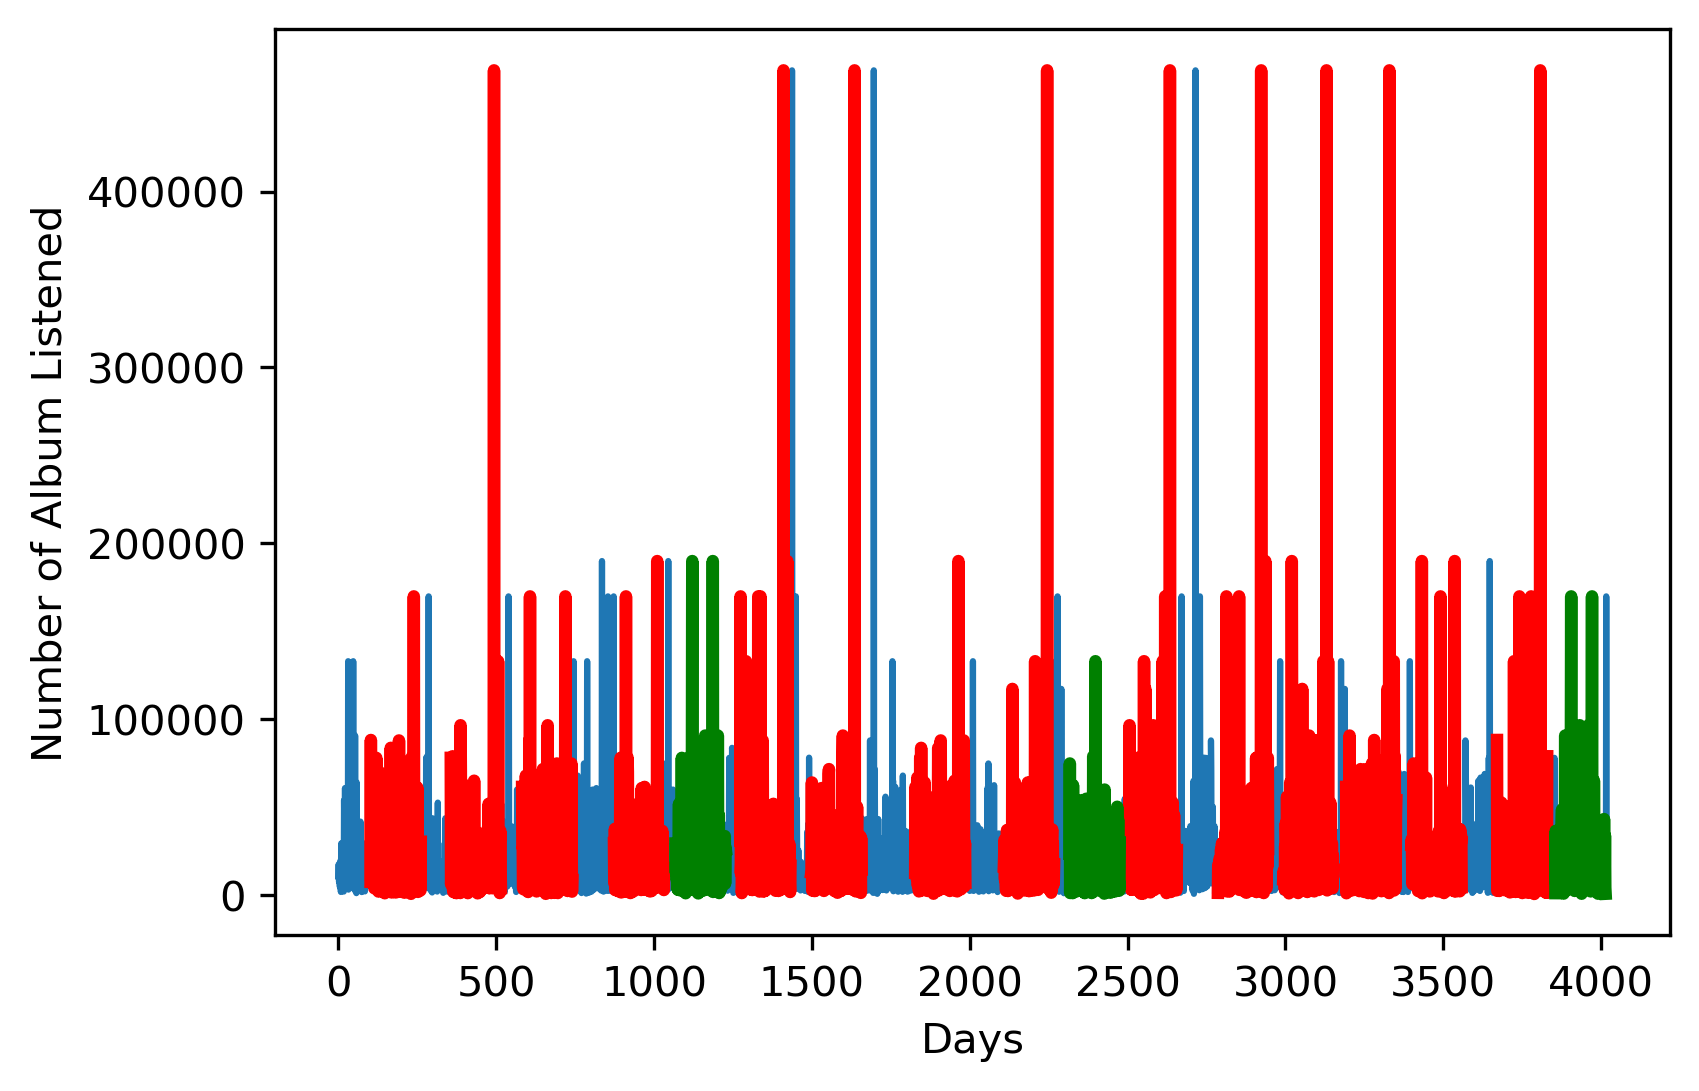

In [35]:
plt.plot(ts_cluster)
colors = ['r', 'g', 'peru', 'purple', 'y','k','grey'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts_cluster[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
        
        
plt.ylabel('Number of Album Listened')
plt.xlabel('Days')
plt.show()

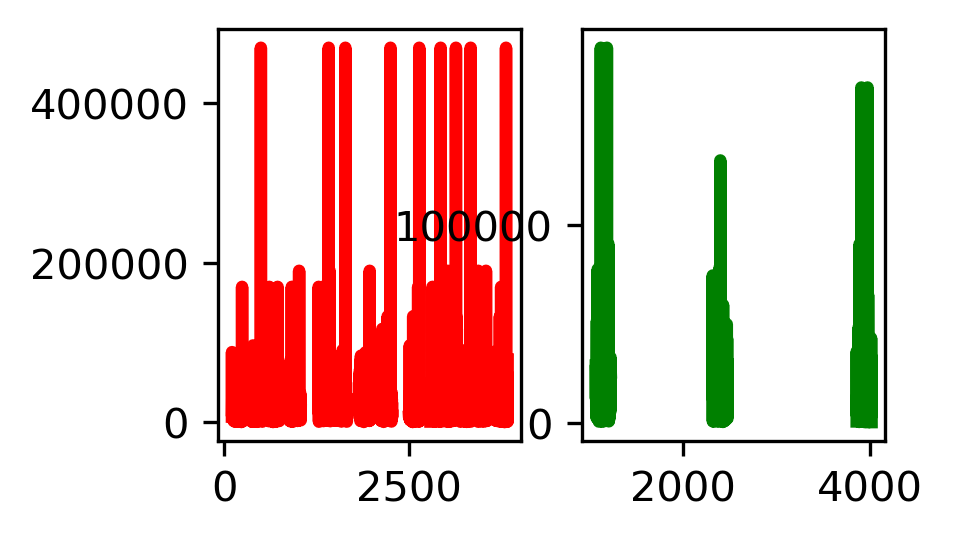

In [36]:
j=1
for m, d, c in zip(mo, mod, colors):
    plt.subplot(2,4,j)
    j+=1
    for i in m:
        m_shape = ts_cluster[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
plt.show()

# ANOMALY DISCOVERY

In [37]:
from matrixprofile.discords import discords

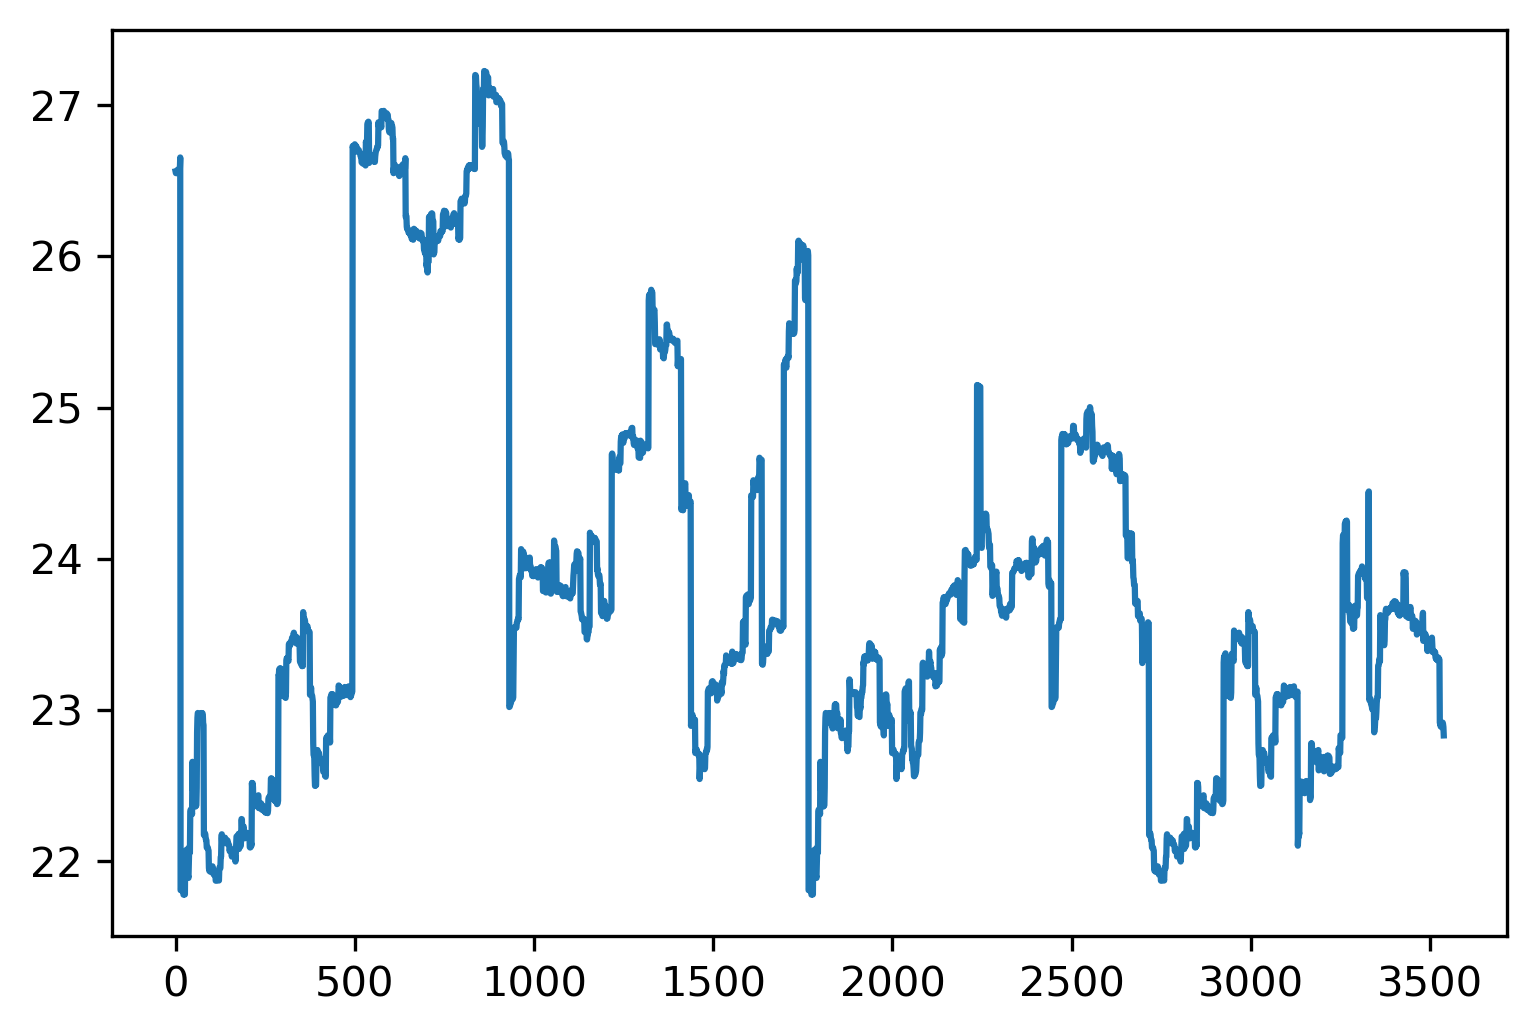

In [38]:
w = 480
mp, mpi = matrixProfile.stomp(ts_cluster, w)

plt.plot(mp)
plt.show()

In [51]:
k = 10 #number of discords to discover
anoms = discords(mp, ex_zone=250, k=k)

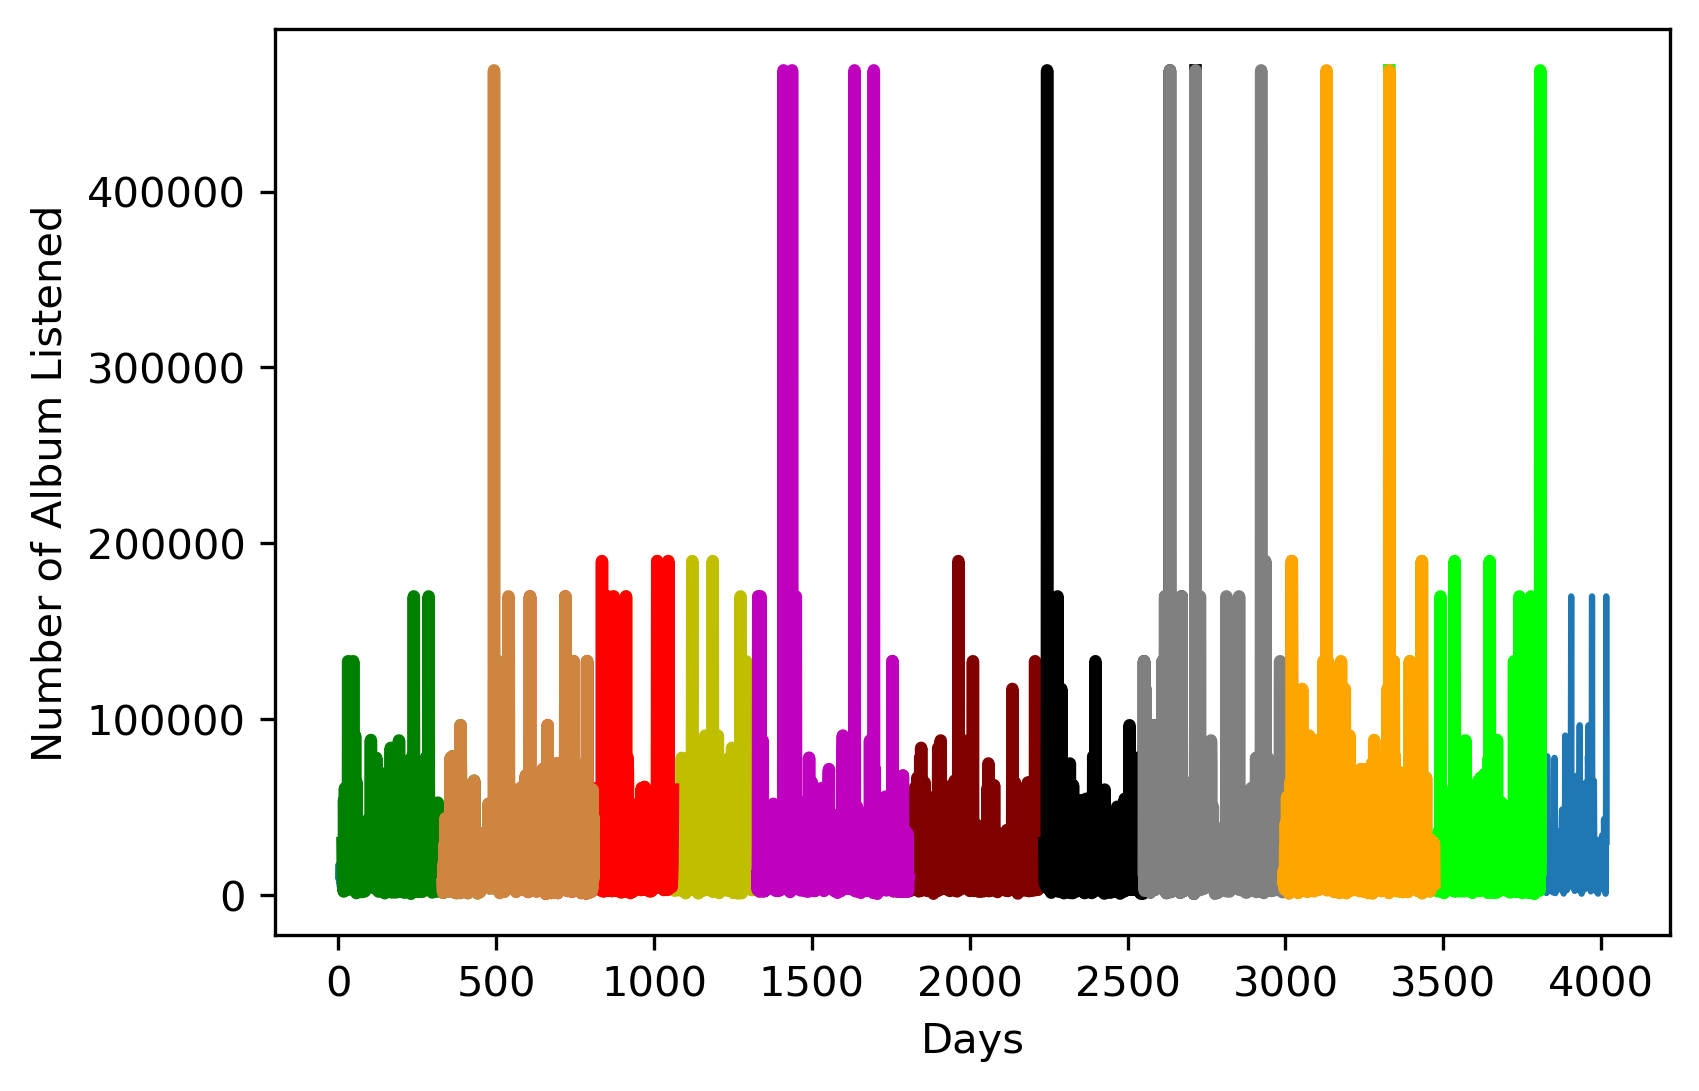

In [52]:
plt.plot(ts_cluster)
colors = ['y','r','g','maroon','m','black','grey','lime','orange','peru'][:k]
for a, c in zip(anoms, colors):
    a_shape = ts_cluster[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

        
plt.ylabel('Number of Album Listened')
plt.xlabel('Days')
plt.show()

# CLUSTERING

In [41]:
def draw_list(ts_list, attribute, ts_number=1000, time = None , formatter = None):
    if ts_number >= len(ts_list): ts_number = len(ts_list)-1
    fig = plt.figure()
    ax = fig.subplots()
    for ts in ts_list[:ts_number]:
        if time == None: index = list(ts.index.values)
        else: index= ts[time]
        ax.plot(index, ts[attribute])
    ax.set_ylabel(attribute)
    if formatter !=None:
        date_form = DateFormatter(formatter)
        ax.xaxis.set_major_formatter(date_form)
    plt.show()

In [42]:
#df=pd.read_csv('C:\ProgramData\Tracks_v1.csv')

attributes = ['album_date_released', 'album_listens']


time_col='album_date_released'

df[time_col] =  pd.to_datetime(df[time_col], format = '%Y-%m-%d %H:%M:%S')
df['Weekday']=df[time_col].apply(lambda x:x.weekday())

mon1=df[df['Weekday']==0][attributes].copy()
tue1=df[df['Weekday']==1][attributes].copy()  #missing part of the day
wed1=df[df['Weekday']==2][attributes].copy() #incompleted too
thu1=df[df['Weekday']==3][attributes].copy()
fri1=df[df['Weekday']==4][attributes].copy()
sat1=df[df['Weekday']==5][attributes].copy()
sun1=df[df['Weekday']==6][attributes].copy()
    
weekdays1 = [mon1, tue1, wed1, thu1,fri1,sat1,sun1]

df[time_col] =  pd.to_datetime(df[time_col], format = '%Y-%m-%d %H:%M:%S')
df['Weekday']=df[time_col].apply(lambda x:x.weekday())
                                 
mon2=df[df['Weekday']==0][attributes].copy()
tue2=df[df['Weekday']==1][attributes].copy()  #missing part of the day
wed2=df[df['Weekday']==2][attributes].copy() #incompleted too
thu2=df[df['Weekday']==3][attributes].copy()
fri2=df[df['Weekday']==4][attributes].copy()
sat2=df[df['Weekday']==5][attributes].copy()
sun2=df[df['Weekday']==6][attributes].copy()
    
weekdays2 = [mon2, tue2, wed2,thu2,fri2,sat2,sun2]

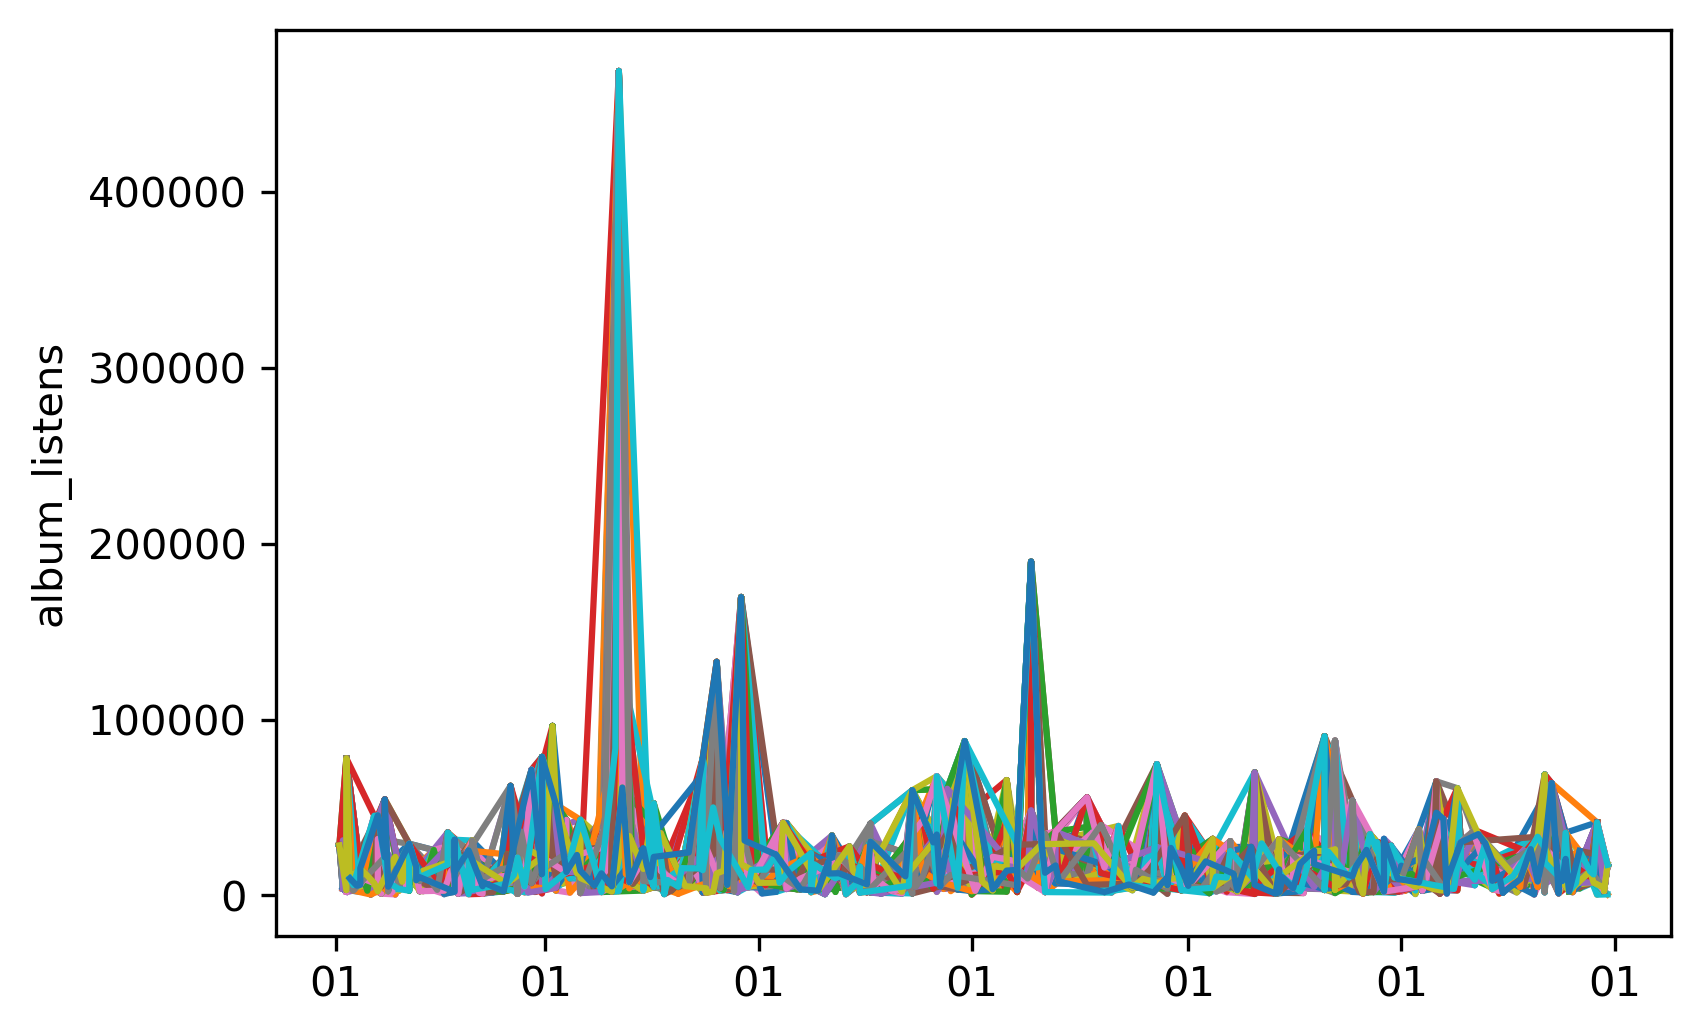

In [43]:


week_size = 144
week_list = []

week1 = pd.DataFrame()
for day in weekdays1:
    day.sort_values(time_col, inplace=True)#first of all: order
    week1 = week1.append(day, ignore_index=True )    ##a week

week1_list = []
tmp = week1.copy() 
while(len(tmp)>=week_size):
    ts = tmp.sample(week_size)
    ts.sort_values(time_col, inplace=True)
    week1_list.append(ts)
    week_list.append(ts)
    tmp.drop(ts.index, axis=0, inplace=True) #remove the sample just extract

    
week2 = pd.DataFrame()
for day in weekdays2:    
    day.sort_values(time_col, inplace=True)#first of all: order
    week2 = week2.append(day, ignore_index=True)    ##a week
    
week2_list = []
tmp = week2.copy() 
while(len(tmp)>=week_size):
    ts = tmp.sample(week_size)
    ts.sort_values(time_col, inplace=True)
    week2_list.append(ts)
    week_list.append(ts)
    tmp.drop(ts.index, axis=0, inplace=True) #remove the sample just extract

    
random.shuffle(week_list)
draw_list(week_list, 'album_listens', 106574, time = time_col ,formatter = '%d')

In [44]:
ts_list = []
for temp in week_list:
    ts = temp['album_listens'].copy()
    ts_list.append(ts)

ts_array = []
ts_size = len(week_list[1])
for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size, 1))
    
ts_array = np.array(ts_array)

ts_array.shape

(72, 144, 1)

In [53]:
!pip install tslearn

In [2]:
!pip install scikit-learn

In [50]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=212884cfeb4e772a5d6827ea3fd5c49f9f33f03605a2e232f8d4076c656cfc4b
  Stored in directory: c:\users\federico ceciliani\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [56]:
!pip install scipy

In [45]:
import sklearn
sklearn.__version__

'0.24.2'

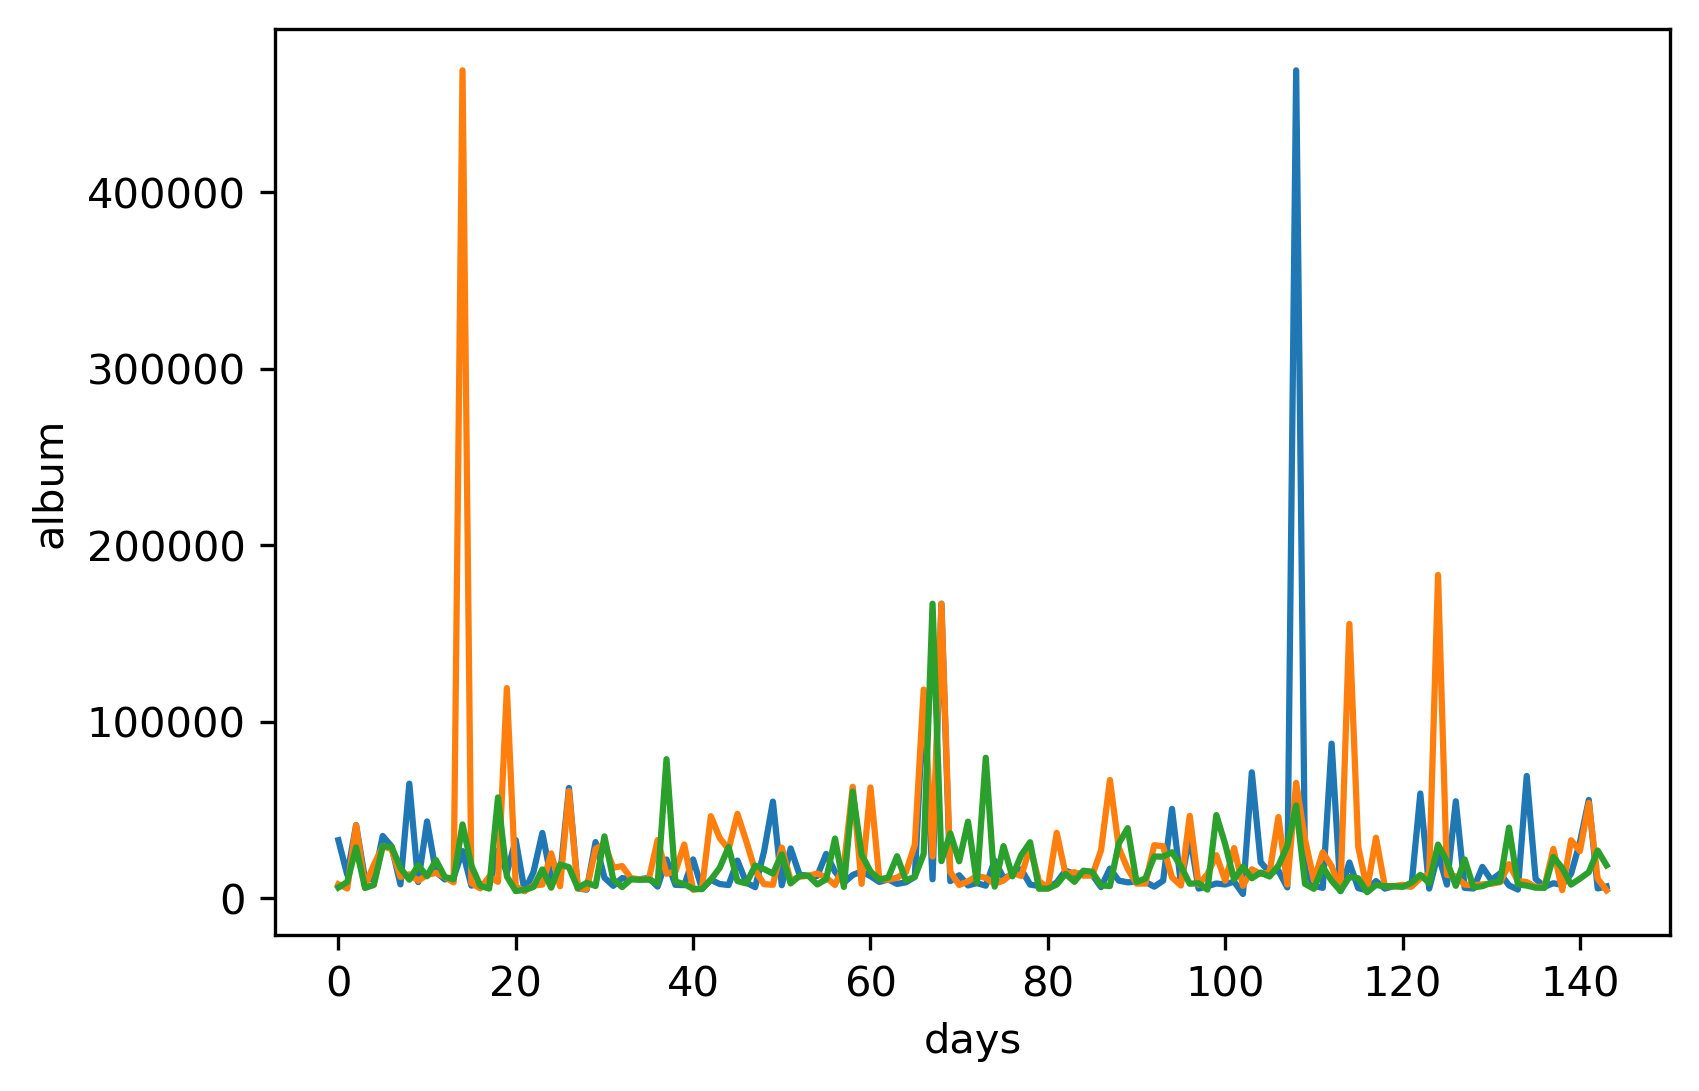

In [46]:
from tslearn.clustering import TimeSeriesKMeans
from sklearn.utils.validation import _check_sample_weight

km = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=0)
km.fit(ts_array)

plt.plot(km.cluster_centers_.reshape(ts_array.shape[1],3))
plt.ylabel('album')
plt.xlabel('days')

plt.show()